In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tweets_data_path='./twitter data/twitter_skin_data.txt'
tweets_skin_data = []
tweets_file = open(tweets_data_path, "r")

#process each line in raw tweets file
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_skin_data.append(tweet)
    except:
        continue

In [3]:
len(tweets_skin_data)

14044

In [114]:
tweets_skin_data[0]

{'created_at': 'Tue Dec 04 03:09:54 +0000 2018',
 'id': 1069790873083236352,
 'id_str': '1069790873083236352',
 'text': 'RT @ProjectMEOW: UPDATE on Jonathan, the kitty with the severe scalping wound. He’s healing nicely and the skin on the top of his head is f…',
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1328174892,
  'id_str': '1328174892',
  'name': 'Barbi Twins Kitties',
  'screen_name': 'KittyLibFront',
  'location': None,
  'url': 'https://www.facebook.com/pages/Kitty-Liberation-Front-KLF-The-BARBI-TWINS-Kitty-page/505629179481205?ref=ts&fref=ts',
  'description': 'Kitty Liberation Front https://t.co/t8OKrjXRc3 #Rescue #Foster #Pledge #lost #feral #stray #CATS/#KITTENS at kill pounds #wlf #TNR #NoKill #anipals #SpayNeuter',
  'translator_type'

In [495]:
json_str = json.dumps(tweets_skin_data[0], indent=2)
print(json_str)


{
  "created_at": "Tue Dec 04 03:09:54 +0000 2018",
  "id": 1069790873083236352,
  "id_str": "1069790873083236352",
  "text": "RT @ProjectMEOW: UPDATE on Jonathan, the kitty with the severe scalping wound. He\u2019s healing nicely and the skin on the top of his head is f\u2026",
  "source": "<a href=\"http://twitter.com\" rel=\"nofollow\">Twitter Web Client</a>",
  "truncated": false,
  "in_reply_to_status_id": null,
  "in_reply_to_status_id_str": null,
  "in_reply_to_user_id": null,
  "in_reply_to_user_id_str": null,
  "in_reply_to_screen_name": null,
  "user": {
    "id": 1328174892,
    "id_str": "1328174892",
    "name": "Barbi Twins Kitties",
    "screen_name": "KittyLibFront",
    "location": null,
    "url": "https://www.facebook.com/pages/Kitty-Liberation-Front-KLF-The-BARBI-TWINS-Kitty-page/505629179481205?ref=ts&fref=ts",
    "description": "Kitty Liberation Front https://t.co/t8OKrjXRc3 #Rescue #Foster #Pledge #lost #feral #stray #CATS/#KITTENS at kill pounds #wlf #TNR #NoKi

In [4]:

skin_tweets = pd.DataFrame()
skin_tweets['text'] = [p['text'] for p in tweets_skin_data]
skin_tweets['user name'] = [p['user']['name'] for p in tweets_skin_data]
skin_tweets['location'] = [p['user']['location'] for p in tweets_skin_data]
skin_tweets['followers count'] = [p['user']['followers_count'] for p in tweets_skin_data]
skin_tweets['friends count'] = [p['user']['friends_count'] for p in tweets_skin_data]
skin_tweets['description'] = [p['user']['description'] for p in tweets_skin_data]
skin_tweets['url'] = [p['entities']['urls'] for p in tweets_skin_data if p['entities']['urls'] != None]
skin_tweets['hashtags'] = [p['entities']['hashtags'] for p in tweets_skin_data]
skin_tweets['retweeted'] = [p['retweeted'] for p in  tweets_skin_data]
skin_tweets['language'] = [p['lang'] for p in tweets_skin_data]
skin_tweets['retweet_count'] = [p['retweet_count'] for p in tweets_skin_data]
skin_tweets['user_mentions'] = [p['entities']['user_mentions'] for p in tweets_skin_data]


## final skin data

In [5]:
skin_tweets.head()

,text,user name,location,followers count,friends count,description,url,hashtags,retweeted,language,retweet_count,user_mentions
0,"RT @ProjectMEOW: UPDATE on Jonathan, the kitty...",Barbi Twins Kitties,None,9461,9278,Kitty Liberation Front https://t.co/t8OKrjXRc3...,[],[],False,en,0,"[{'screen_name': 'ProjectMEOW', 'name': 'Proje..."
1,Natural Skin Care for INFLAMED Skin from All N...,Tea Herb&Milk Soaps,"Miamisburg, OH",2501,2169,Female Owned/Operated Small Business-Handmade ...,"[{'url': 'https://t.co/mLNrqdDvLy', 'expanded_...",[],False,en,0,[]
2,@xoalexrojas are you gonna drop your skin care...,NANI,"seattle, wa",129,179,more self love / aquarius,[],[],False,en,0,"[{'screen_name': 'xoalexrojas', 'name': 'alexa..."
3,RT @3shells1991: Car? Hyundai\nShoes? Puma\nMa...,oxyJIN,OT7,1559,3104,Team work makes the dream work [ FAN ACCOUNT ]...,[],[],False,en,0,"[{'screen_name': '3shells1991', 'name': 'CHELL..."
4,Someone buy me all the skin care products from...,GA🍑,"Pensacola, FL",797,514,None,[],[],False,en,0,[]


## hashtags

In [152]:
#tweets_skin_data[0]['entities']['hashtags']==[]
#skin_tweets['hashtags'] = [p['entities']['hashtags'][0]["text"] for p in tweets_skin_data if p['entities']['hashtags']!=[]]
hashtags=[]
for i in range(len(tweets_skin_data)):
    if tweets_skin_data[i]['entities']['hashtags']!=[]:
        hashtags.append(tweets_skin_data[i]['entities']['hashtags'][0]["text"])
    else:
        hashtags.append("None")

len(hashtags) #14044

In [15]:
hashtags=[]
for i in range(len(tweets_skin_data)):
    if tweets_skin_data[i]['entities']['hashtags']!=[]:
        a=tweets_skin_data[i]['entities']['hashtags']
        for j in range(len(a)):
            hashtags.append(a[j]["text"])
        #hashtags.append(tweets_trade_data[i]['entities']['hashtags'][0]["text"])
#    else:
 #       hashtags.append("None")

len(hashtags)

2424

In [17]:
import re
hashtags_new=[x.lower() for x in hashtags]
hashtag_df=pd.DataFrame(hashtags_new)
hashtag_df[0].value_counts()[0:15]

peta                  190
win                   112
skincare               90
ncgiftguide            58
canwin                 58
skin                   51
prelovedadvent         45
yorkshireis            36
londonislovinit        36
sheffieldissuper       36
beauty                 34
this_deal_ends_oct     29
etude                  23
アンチエイジング               23
antiaging              21
Name: 0, dtype: int64

## follower count vs friends count

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

In [227]:
x=skin_tweets['followers count']
y=skin_tweets['friends count']
df=pd.DataFrame({'follower count':x,'friends count':y})

In [407]:

pd.set_option('display.width', 1000)
df.describe()

,follower count,friends count
count,1.404400e+04,14044.000000
mean,4.510071e+03,1330.298490
std,8.493781e+04,6076.108388
min,0.000000e+00,0.000000
25%,1.260000e+02,160.000000
50%,4.020000e+02,383.000000
75%,1.122250e+03,978.000000
max,6.774799e+06,342397.000000


C:\Users\Wanti\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Wanti\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


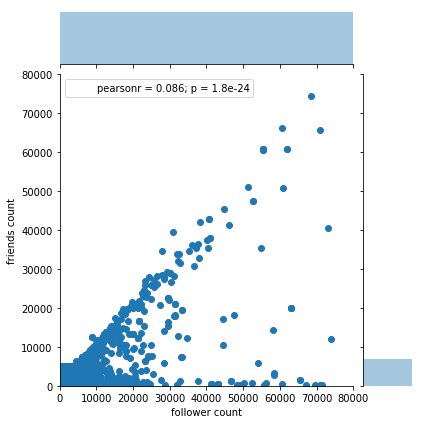

In [254]:
sns.jointplot(x="follower count",y="friends count",
              data=df,xlim=(0, 80000),ylim=(0,80000));

In [279]:
xx=[]
for i in df['follower count']:
    if i!=0:
        xx.append(np.log(i))
    else:
        xx.append(0)

C:\Users\Wanti\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


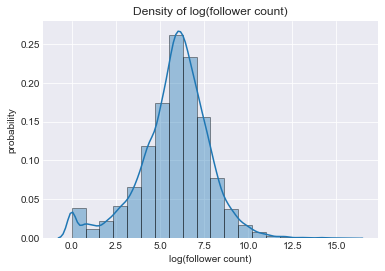

In [280]:
import seaborn as sns
sns.set_style('darkgrid')
sns.distplot(xx, hist=True,bins=20,hist_kws={'edgecolor':'black'})
plt.title('Density of log(follower count)')
plt.xlabel('log(follower count)')
plt.ylabel('probability')
plt.show()

## top authoritative users

In [490]:
top_user=skin_tweets[['user name','followers count']]
len(top_user)

14044

In [296]:
users=top_user.groupby(['user name']).max().sort_values('followers count',ascending=False)
users[0:10]

,followers count
user name,
ELLE Magazine (US),6774799
Liputan6.com,3400507
Nina Garcia,3280487
KASKUS,2599507
Fashionista.com,2196921
Koran Tempo,1644028
TEMPO.CO,1471429
The Cut,1401830
Real Simple,1398021


## text

In [6]:
# text from top 30 users
text_data=skin_tweets[['user name','text','description']]
topusers=users[0:50]
w=[i in list(topusers.index) for i in text_data['user name']]
top_user_text=text_data[w]
top_user_text[0:10]

NameError: name 'users' is not defined

In [7]:
# text
from wordcloud import WordCloud, STOPWORDS
text_words = ' '

for val in top_user_text['text']: 
    for words in str(val).split(): 
        text_words = text_words + words.lower() + ' '

NameError: name 'top_user_text' is not defined

In [443]:
# remove link and rt and @
result = re.sub(r"@\S+|http\S+|rt", "", text_words)

In [447]:
stopwords = set(STOPWORDS) 
from nltk.corpus import stopwords

# create dictionary
wordcount={}
for word in result.split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace(" —","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("…","")
    word = word.replace("-","")
    word = word.replace("&","")
    word = word.replace(" ","")
    word = word.replace("  ","")
    word = word.replace("|","")
    word = word.replace(";","")
    if word not in stopwords.words('english'):
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
                        

In [448]:
import collections
print("Top 10 words in top users' tweets: \n")
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(10):
    print(word, ": ", count)

Top 10 words in top users' tweets: 

skin :  39
care :  38
derma :  9
kosmetik :  8
routine :  6
antiaging :  5
oplosan :  5
buat :  5
now :  4
amp :  4


In [8]:
## all the tweets
all_text_data=skin_tweets[['text']]

all_text_words = ' '
for val in all_text_data['text']: 
    for words in str(val).split():
        all_text_words = all_text_words + words.lower() + ' '

In [404]:
#all_text_words

' rt @projectmeow: update on jonathan, the kitty with the severe scalping wound. he’s healing nicely and the skin on the top of his head is f… natural skin care for inflamed skin from all natural skin care from tea, herb &amp; milk soaps https://t.co/mlnrqddvly https://t.co/aopw3dudlv @xoalexrojas are you gonna drop your skin care routine orrrrr rt @3shells1991: car? hyundai shoes? puma make up? vt skin care? mediheal cellphone? lg phone op? skt food? dunkin drinks? coca cola dept s… someone buy me all the skin care products from drunk elephant plz rt @xtalsnow: dear glass skin yoonmin, drop your skin care routine pls https://t.co/7iqtb5msnn rt @hugssselfcare: skin care tips: - drink lots of water 💦 - try not to touch your face🌸x - try to cut out greasy foods🍿x - don’t share… forget about all your products for skin care. cacay oil is the best antiaging you can find on amazon store. order y… https://t.co/9tskwvsthy why your skin so clear? please drop your skin care routine. forget about

In [10]:
## all the tweets
import nltk
import string
import re
from nltk.corpus import stopwords
#stopwords = set(STOPWORDS) 
result = re.sub(r"@\S+|http\S+|rt", "", all_text_words) #remove @ link
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in result.split()] 
words=[word for word in stripped if word.isalpha()] #remove punctuation
clean_words = [w for w in words if not w in stopwords.words('english')] #remove stopwords

In [12]:
import collections
wordcount={}
for word in clean_words:
    if word not in wordcount:
        wordcount[word] = 1
    else:
        wordcount[word] += 1

print("Top 15 words in all tweets: \n")
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(15):
    print(word, ": ", count) 

Top 15 words in all tweets: 

skin :  15414
care :  13145
one :  4089
day :  2526
acne :  2520
week :  2407
straight :  2375
misses :  2372
products :  2173
routine :  1839
sta :  1814
perfect :  1407
change :  1362
told :  1356
insta :  1354


In [467]:
plot_words=" ".join(clean_words)

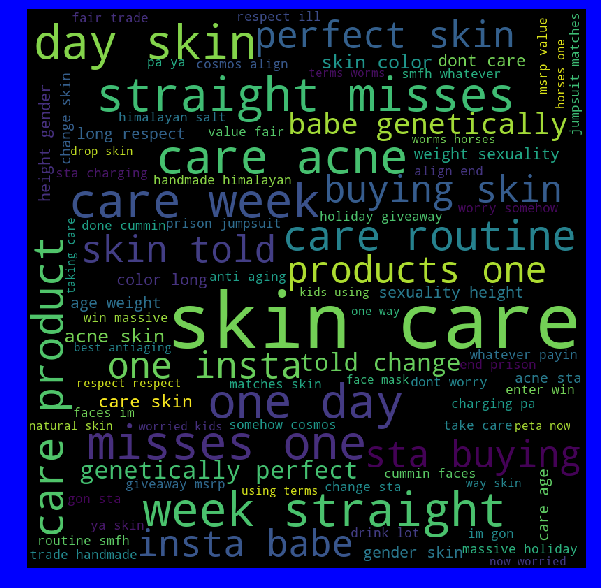

In [473]:

wordcloud = WordCloud(width = 800, height = 800, background_color ='black', 
                      stopwords = stopwords, min_font_size = 15).generate(plot_words) 
  
# plot wordcloud image                      
plt.figure(figsize = (8, 8), facecolor = 'blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## top url

In [474]:
skin_tweets.head()

,text,user name,location,followers count,friends count,description,url,hashtags,retweeted,language,retweet_count,user_mentions
0,"RT @ProjectMEOW: UPDATE on Jonathan, the kitty...",Barbi Twins Kitties,None,9461,9278,Kitty Liberation Front https://t.co/t8OKrjXRc3...,[],[],False,en,0,"[{'screen_name': 'ProjectMEOW', 'name': 'Proje..."
1,Natural Skin Care for INFLAMED Skin from All N...,Tea Herb&Milk Soaps,"Miamisburg, OH",2501,2169,Female Owned/Operated Small Business-Handmade ...,"[{'url': 'https://t.co/mLNrqdDvLy', 'expanded_...",[],False,en,0,[]
2,@xoalexrojas are you gonna drop your skin care...,NANI,"seattle, wa",129,179,more self love / aquarius,[],[],False,en,0,"[{'screen_name': 'xoalexrojas', 'name': 'alexa..."
3,RT @3shells1991: Car? Hyundai\nShoes? Puma\nMa...,oxyJIN,OT7,1559,3104,Team work makes the dream work [ FAN ACCOUNT ]...,[],[],False,en,0,"[{'screen_name': '3shells1991', 'name': 'CHELL..."
4,Someone buy me all the skin care products from...,GA🍑,"Pensacola, FL",797,514,None,[],[],False,en,0,[]


In [475]:
url=[]
for i in range(len(tweets_skin_data)):
    if tweets_skin_data[i]['entities']['urls']!=[]:
        url.append(tweets_skin_data[i]['entities']['urls'][0]["url"])
    else:
        url.append("None")

len(url) #14044

14044

In [491]:
print("Top urls in tweets: \n")
url_df=pd.DataFrame(url)
url_df[0].value_counts()[0:10]

Top urls in tweets: 



None                       9743
https://t.co/mLNrqdDvLy      61
https://t.co/WJCfqmx49Z      51
https://t.co/wJHnFNul9e      49
https://t.co/vo966dDfEa      29
https://t.co/7m5fK3JMj9      29
https://t.co/ZBP8be4n4h      15
https://t.co/msNgY2SOcP      15
https://t.co/mhy7pWegxM      10
https://t.co/rLzmovw1ma       9
Name: 0, dtype: int64

## top retweets

In [492]:
tweets_data_path='./twitter data/twitter_skin_data.txt'
retweets = {}
fh = open(tweets_data_path, 'r')
for line in fh:
    try:
        retweet = json.loads(line)
    except:
        continue
    if 'retweeted_status' not in retweet:
        continue
    rt = retweet['retweeted_status']
    if rt['retweet_count'] < 1000:
        continue
    retweets[rt['id_str']] = rt
    # convert to list
retweets = [retweets[w] for w in retweets.keys()]
    # sort by retweet count
retweets.sort(key=lambda x: -x['retweet_count'])

In [494]:
for t in retweets[:10]:
    print ('['+ t['user']['screen_name'] + ']: ' + t['text'] + \
    ' [' + str(t['retweet_count']) + ' retweets]'+'\n')

[3shells1991]: Car? Hyundai
Shoes? Puma
Make up? VT
Skin care? Mediheal
Cellphone? LG
Phone op? SKT
Food? Dunkin
Drinks? Coca Cola… https://t.co/WpkVokf7Y8 [38968 retweets]

[ThomasBeautyy]: skin care twitter when u ask them how to clear acne https://t.co/ueJCAx26Xf [33881 retweets]

[_imtheent]: Laziness will ruin your life. You can’t  be lazy concerning your family life, your friendships, career, side hustle… https://t.co/bb9fgGlUas [32875 retweets]

[puterimzh]: Lepas dah pakai mcm2 jenis skin care tp tak cantik jugak

Me; https://t.co/WJCfqmx49Z [17380 retweets]

[sighbrattt]: NO bitch can EVER  get under my skin about any nigga i fucked with 😚because for every nigga i fucked with in the pa… https://t.co/IU7cG128ft [13287 retweets]

[MaisarahMahmud]: By @MaisarahMahmud 

List of skin care topics I’ve talked : [9879 retweets]

[JudgeJudy]: I have never endorsed any skin care product. Please do not buy any product for the skin that uses my name or image… https://t.co/gozdsxVl6C [8778